# 다항 회귀
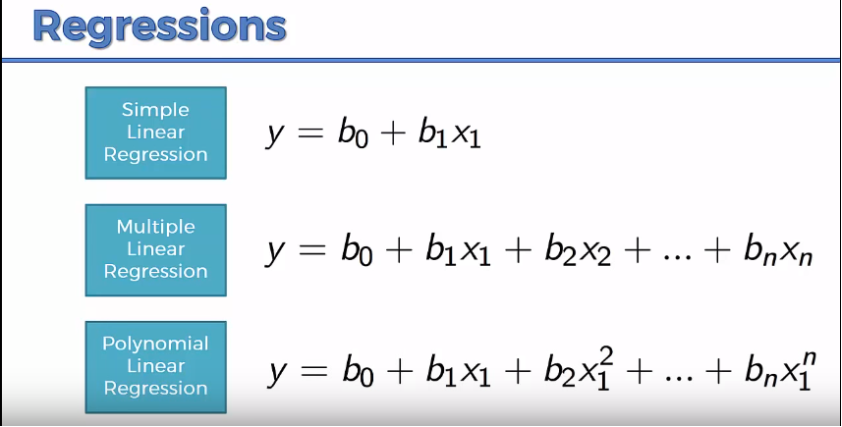

## 다항 회귀에서 속성이 한개인 경우: 다항 회귀
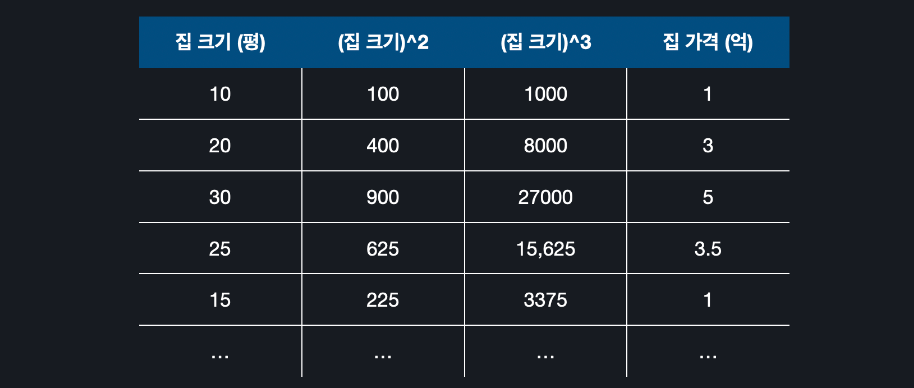
#### 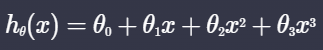
### 입력변수가 3개인 다중선형회귀 실행(3차식)

## 다항 회귀에서 속성이 여러개인 경우: 다중 다항회귀
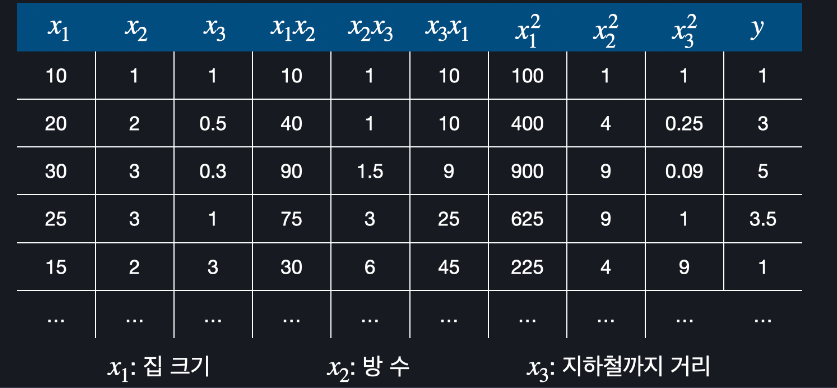
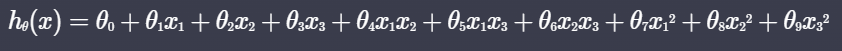
### 입력변수가 9개인 다중선형회귀 실행(2차식)

### 속성 사이의 복잡한 관계
지금까지 영상으로 내내 봤던 집 값 예측 문제를 생각해볼게요.

저희는 항상 집의 크기라는 변수가 주어진다는 가정을 했고요. 이걸 하나의 속성으로 이용했는데요. 사용하는 데이터가 항상 이렇게 하나만 사용해도 의미가 있는 완벽한 변수일 수는 없습니다. 예를 들어 집이 사각형이라고 가정하고 집 크기 대신 집의 높이와 너비 데이터만 있다고 합시다.

사실 아무리 너비가 커도 높이가 작거나, 높이만 크고 너비만 작으면 크기가 작고 구조가 효율적이지 않기 때문에 집 값이 높지 않을 텐데요. 사실 이 두 변수들보다 집값을 예측하는 데 훨씬 좋은 수치는 이 둘을 곱한 값, 집의 넓이잖아요?



단순 선형 회귀를 사용하면 이 두 변수가 서로 독립적이기 때문에 프로그램은 “높이와 너비가 같이 커야지만 집 값도 커진다”라는 관계를 학습할 수 없습니다. 쉽게 생각하면 "높이"라는 속성이 집 값에 미치는 영향, 그리고 "너비"라는 속성이 집 값에 미치는 영향을 따로 찾아내는 거죠.

너비와 높이처럼 이렇게 딱 맞아떨어지지는 않더라도, 집이 아무리 커도, 높은 층이 아니거나 지하철에서 아무리 가까워도 지은지 20년이 넘었으면 집 값이 낮을 수 있습니다. 이런 경우들에도 마찬가지로 단순 선형 회귀를 쓰면 속성 하나하나가 다 독립적이기 때문에 이런 변수들 사이의 관계를 최종 예측 결과에 반영하지 못하는 거죠.

속성들을 서로 곱해서 차항을 높여주면, 그러니까 선형 회귀 문제를 다항 회귀 문제로 만들어주면 속성들 사이에 있을 수 있는 복잡한 관계들을 프로그램에 학습시킬 수 있습니다.

https://www.codeit.kr/learn/3047

#### 속성간의 관계를 알 수 있는 것이 다항회귀의 강점

In [41]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


import pandas as pd

In [29]:
boston_dataset = load_boston()

In [30]:
boston_dataset.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [31]:
boston_dataset.data.shape

(506, 13)

In [32]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [33]:
polynomial_transformer = PolynomialFeatures(2)

In [34]:
polynomial_data = polynomial_transformer.fit_transform(boston_dataset.data)

In [35]:
polynomial_data

array([[1.00000000e+00, 6.32000000e-03, 1.80000000e+01, ...,
        1.57529610e+05, 1.97656200e+03, 2.48004000e+01],
       [1.00000000e+00, 2.73100000e-02, 0.00000000e+00, ...,
        1.57529610e+05, 3.62766600e+03, 8.35396000e+01],
       [1.00000000e+00, 2.72900000e-02, 0.00000000e+00, ...,
        1.54315409e+05, 1.58310490e+03, 1.62409000e+01],
       ...,
       [1.00000000e+00, 6.07600000e-02, 0.00000000e+00, ...,
        1.57529610e+05, 2.23851600e+03, 3.18096000e+01],
       [1.00000000e+00, 1.09590000e-01, 0.00000000e+00, ...,
        1.54802902e+05, 2.54955600e+03, 4.19904000e+01],
       [1.00000000e+00, 4.74100000e-02, 0.00000000e+00, ...,
        1.57529610e+05, 3.12757200e+03, 6.20944000e+01]])

In [36]:
polynomial_data.shape

(506, 105)

In [37]:
polynomial_feature_names = polynomial_transformer.get_feature_names(boston_dataset.feature_names)


In [38]:
X = pd.DataFrame(polynomial_data, columns = polynomial_feature_names)

In [42]:
# 다항회귀를 위한 데이터
X

,1,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,...,TAX^2,TAX PTRATIO,TAX B,TAX LSTAT,PTRATIO^2,PTRATIO B,PTRATIO LSTAT,B^2,B LSTAT,LSTAT^2
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,...,87616.0,4528.8,117482.40,1474.08,234.09,6072.570,76.194,157529.6100,1976.5620,24.8004
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,...,58564.0,4307.6,96049.80,2211.88,316.84,7064.820,162.692,157529.6100,3627.6660,83.5396
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,...,58564.0,4307.6,95064.86,975.26,316.84,6992.374,71.734,154315.4089,1583.1049,16.2409
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,...,49284.0,4151.4,87607.86,652.68,349.69,7379.581,54.978,155732.8369,1160.2122,8.6436
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,...,49284.0,4151.4,88111.80,1183.26,349.69,7422.030,99.671,157529.6100,2115.4770,28.4089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,...,74529.0,5733.0,107013.27,2639.91,441.00,8231.790,203.070,153656.1601,3790.5433,93.5089
502,1.0,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,...,74529.0,5733.0,108353.70,2478.84,441.00,8334.900,190.680,157529.6100,3603.8520,82.4464
503,1.0,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,...,74529.0,5733.0,108353.70,1539.72,441.00,8334.900,118.440,157529.6100,2238.5160,31.8096
504,1.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,...,74529.0,5733.0,107411.85,1769.04,441.00,8262.450,136.080,154802.9025,2549.5560,41.9904


In [44]:
y = pd.DataFrame(boston_dataset.target, columns = ["MEDV"])
y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [51]:
model = LinearRegression()

In [52]:
model.fit(X_train, y_train)

LinearRegression()

In [54]:
model.coef_

array([[-2.55720149e-07, -5.09146959e+00, -1.65753983e-01,
        -5.97358604e+00,  2.43179261e+01,  1.65180559e+02,
         2.19910116e+01,  1.03167123e+00, -5.66895775e+00,
         3.22443249e+00, -1.10055942e-02,  5.35127787e+00,
        -4.81524409e-02,  7.53109325e-01,  2.16774682e-03,
         2.69938772e-01,  5.87901385e-01,  2.41731932e+00,
        -2.52413196e-02,  8.92859572e-02, -5.18832420e-03,
        -5.77807152e-02,  3.55602049e-01, -3.86092282e-02,
         5.43572101e-01, -3.18134359e-04,  2.40035425e-02,
        -7.48850219e-04, -7.16133310e-03, -1.06886010e-01,
        -1.27782609e+00,  2.50137719e-02,  1.14111417e-04,
        -1.25254119e-02, -4.68024813e-03,  6.05725185e-04,
        -8.57873132e-03,  1.85030053e-03, -4.64730601e-03,
         3.08484808e-02, -2.09065897e-01,  1.30035723e+00,
         3.13497405e-01,  6.72540164e-04,  7.51823883e-02,
        -7.38014889e-03,  4.23364348e-04, -6.72155117e-03,
         6.42107774e-03, -5.32275093e-03,  2.43179260e+0

In [56]:
model.intercept_

array([-141.89855577])

In [66]:
y_test_predict = model.predict(X_test)

In [67]:
mean_squared_error(y_test, y_test_predict)**0.5

3.1965276509967127

## 다항 회귀 실습

In [72]:
# 필요한 라이브러리 import
from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import pandas as pd  

diabetes_dataset = datasets.load_diabetes()  # 데이터 셋 갖고오기

# 코드를 쓰세요
polynomial_transformer = PolynomialFeatures(2)
polynomial_data = polynomial_transformer.fit_transform(diabetes_dataset.data)
polynomial_feature_names = polynomial_transformer.get_feature_names(diabetes_dataset.feature_names)
X = pd.DataFrame(polynomial_data, columns = polynomial_feature_names)

# 테스트 코드
# 목표 변수
y = pd.DataFrame(diabetes_dataset.target, columns=['diabetes'])

# 코드를 쓰세요
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)
model = LinearRegression()
model.fit(X_train, y_train)
y_test_predict = model.predict(X_test)

mse = mean_squared_error(y_test, y_test_predict)
mse ** 0.5

57.877049027249136

In [76]:
X

,1,age,sex,bmi,bp,s1,s2,s3,s4,s5,...,s3^2,s3 s4,s3 s5,s3 s6,s4^2,s4 s5,s4 s6,s5^2,s5 s6,s6^2
0,1.0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,...,0.001884,0.000113,-0.000864,0.000766,0.000007,-0.000052,0.000046,0.000396,-0.000351,0.000311
1,1.0,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,...,0.005537,-0.002939,-0.005085,-0.006861,0.001560,0.002699,0.003641,0.004669,0.006300,0.008502
2,1.0,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,...,0.001047,0.000084,-0.000093,0.000839,0.000007,-0.000007,0.000067,0.000008,-0.000074,0.000672
3,1.0,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,...,0.001299,-0.001236,-0.000818,0.000337,0.001177,0.000779,-0.000321,0.000515,-0.000212,0.000088
4,1.0,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,...,0.000066,-0.000021,-0.000260,-0.000380,0.000007,0.000083,0.000121,0.001023,0.001492,0.002175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,1.0,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,...,0.000822,0.000074,-0.000894,-0.000207,0.000007,-0.000081,-0.000019,0.000973,0.000225,0.000052
438,1.0,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,...,0.000822,-0.000984,0.000520,-0.001276,0.001177,-0.000622,0.001526,0.000328,-0.000806,0.001979
439,1.0,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,...,0.000625,0.000277,0.001172,-0.000387,0.000123,0.000519,-0.000172,0.002198,-0.000726,0.000240
440,1.0,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,...,0.000822,-0.000762,-0.001277,0.000744,0.000705,0.001183,-0.000689,0.001983,-0.001155,0.000672
